<a href="https://colab.research.google.com/github/BasmaAfreen/Stats-DeepLearning_Projects/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot  as plt
import seaborn as sns



1. **LB (Baseline Fetal Heart Rate)**: This is like the average speed of the baby's heartbeat over some time.
2. **AC (Accelerations)**: When the baby's heartbeat goes faster for a short while, which is usually a good sign.
3. **FM (Fetal Movements)**: When the baby moves around inside the mother's tummy.
4. **UC (Uterine Contractions)**: These are the muscle squeezes in the mother's tummy that can affect the baby's heartbeat.
5. **DL (Decelerations Late)**: This means the baby's heartbeat slows down after the mother has a contraction, which might mean the baby is having some trouble.
6. **DS (Decelerations Short)**: The baby's heartbeat slows down for a short time.
7. **DP (Decelerations Prolonged)**: The baby's heartbeat slows down for a long time, which might not be good.
8. **ASTV (Abnormal Short Term Variability)**: This means the baby's heartbeat changes in a strange way over a short period.
9. **MSTV (Mean Short Term Variability)**: This is the average amount of change in the baby's heartbeat over a short time.
10. **ALTV (Abnormal Long Term Variability)**: This means the baby's heartbeat changes in a strange way over a long period.
11. **MLTV (Mean Long Term Variability)**: This is the average amount of change in the baby's heartbeat over a long time.



# 1.	Data Cleaning and Preparation:



### - Load the dataset into a DataFrame or equivalent data structure.

In [ ]:
import pandas as pd
df=pd.read_csv("Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [ ]:
df.info()   # we can the no of rows and col and what is the datatype of each col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [ ]:
df.isnull().sum()  # i have to takout mean of lb and fill in null value place



LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

### - Handle missing values appropriately (e.g., imputation, deletion).

In [ ]:

Z=df['NSP'].mode()[0]
df['NSP'].fillna(Z, inplace=True)

C:\Users\Basma\AppData\Local\Temp\ipykernel_20260\3601775631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NSP'].fillna(Z, inplace=True)


In [ ]:
# Calculate the median of the column
median_value=df['LB'].median()

# Replace null values with the median
df['LB'].fillna(median_value, inplace=True)

# Confirm replacement
df['LB'].isnull().sum()  # Should return 0, meaning no null values

a=df['AC'].median()
df['AC'].fillna(a, inplace=True)

Y=df['MLTV'].median()
df['MLTV'].fillna(Y, inplace=True)

Z=df['Width'].median()
df['Width'].fillna(Z, inplace=True)

Z=df['Tendency'].median()
df['Tendency'].fillna(Z, inplace=True)



B=df['DP'].median()
df['DP'].fillna(B, inplace=True)

C=df['DS'].median()
df['DS'].fillna(C, inplace=True)


C:\Users\Basma\AppData\Local\Temp\ipykernel_20260\1909002546.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LB'].fillna(median_value, inplace=True)
C:\Users\Basma\AppData\Local\Temp\ipykernel_20260\1909002546.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

### -	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [ ]:
# Inspect data types
df.dtypes
# as we can see no numerical values stored as strings values.

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [ ]:
for col in df.columns:
    if pd.api.types.is_categorical_dtype(df[col]):
        print(f"Column '{col}' is categorical.")

C:\Users\Basma\AppData\Local\Temp\ipykernel_20260\2009101094.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


In [ ]:
#: This function explicitly checks for the categorical data type  or to verify categorical dat
A=pd.api.types.is_categorical_dtype(df['ASTV'])
B=pd.api.types.is_categorical_dtype(df['Tendency'])
print(A,B)


False False


C:\Users\Basma\AppData\Local\Temp\ipykernel_20260\1266115535.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  A=pd.api.types.is_categorical_dtype(df['ASTV'])
C:\Users\Basma\AppData\Local\Temp\ipykernel_20260\1266115535.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  B=pd.api.types.is_categorical_dtype(df['Tendency'])


### -	Detect and treat outliers if necessary

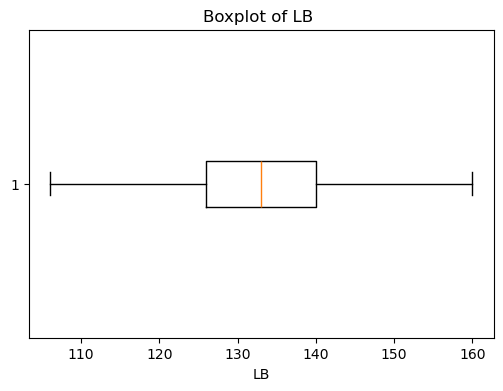

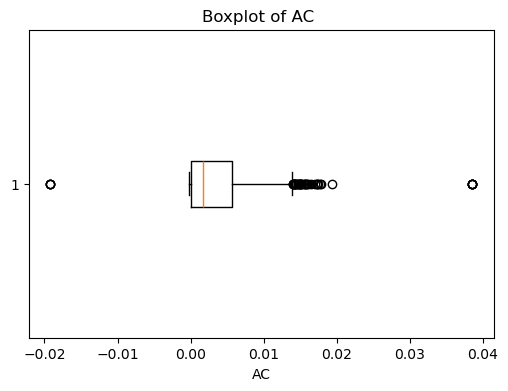

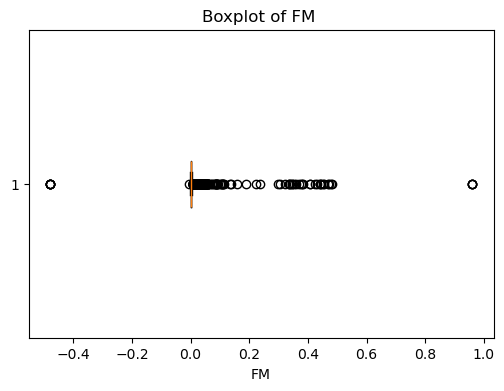

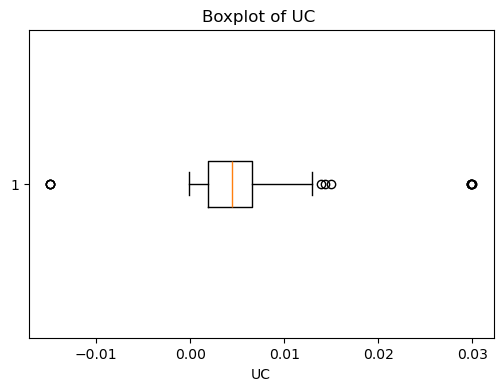

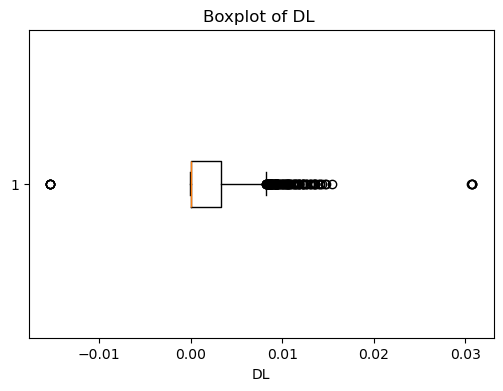

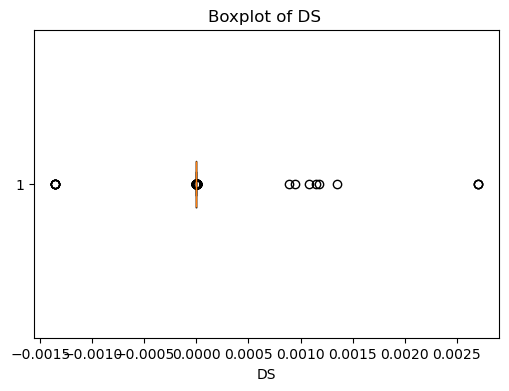

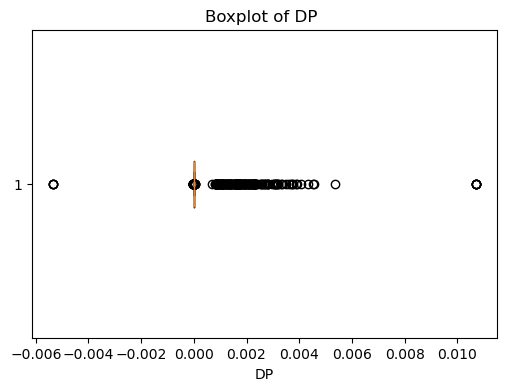

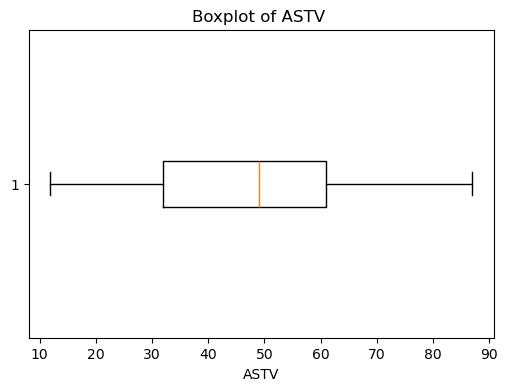

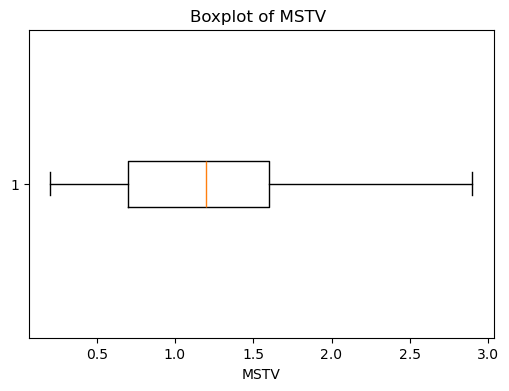

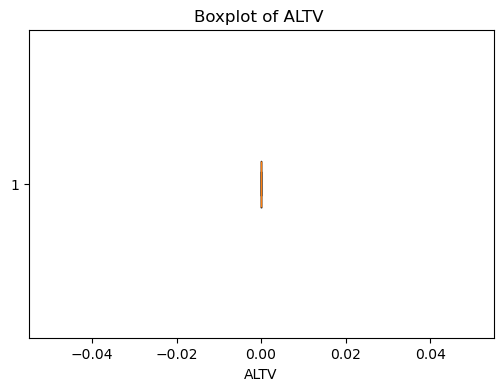

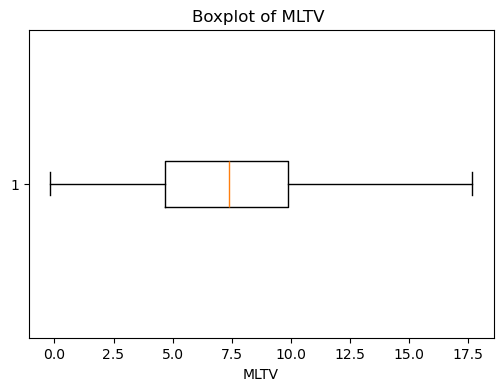

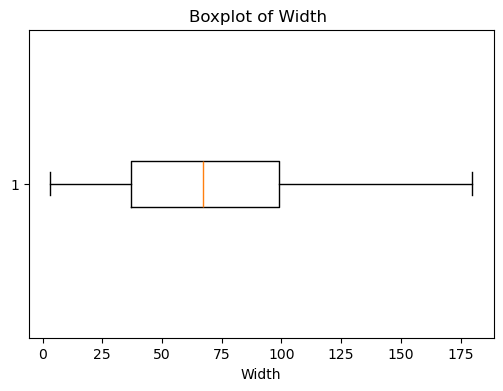

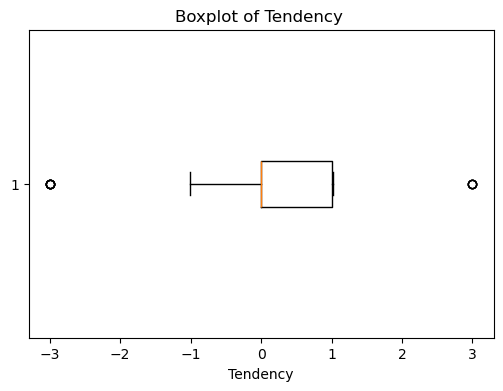

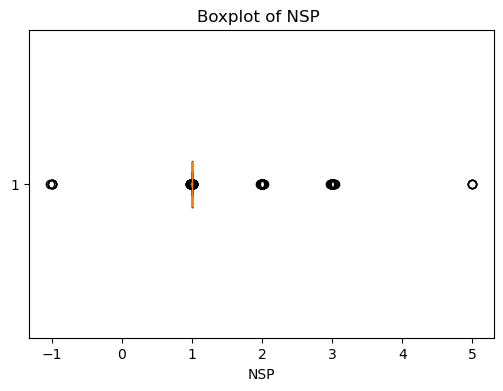

In [ ]:

numeric_col=df.select_dtypes(include=['float']).columns
for col in numeric_col:
    plt.figure(figsize=(6, 4))
    plt.boxplot(x=df[col],vert=False)
    plt.xlabel(col)
    plt.title(f"Boxplot of {col} ")
    plt.show()


- most of datapoints (or iqr range values) are on 1 in nsp
- most of datapoints (or iqr range values) are btw 0 to 1 in tendency

- most of datapoints are on 0.0 in DP
- most of datapoints are on 0.0 in DS.
- most of datapoints are on 0.0 in fm.
- most of datapoints are on 0.0 in DL.

- THE range is small(-0.01  0.03) and irq(0.00 0.01) AND datapoints lies in this range is even more smaller  in UC
- THE range is small(-0.2  0.04) and irq(0.00 0.) is even more smaller,most of datapoints are on 0.00 IN AC




In [ ]:
numeric_col=df.select_dtypes(include=['float']).columns

# Identify columns with outliers using boxplots (replace with your actual outlier detection logic if needed)
# Initialize an empty list to store columns that contain outliers
outlier_cols = []

# Loop through each numerical column to detect outliers
for col in numeric_col:
   # Calculate the first quartile (Q1)
    Q1 = df[col].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = df[col].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    # Define the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR
    # Check if there are any outliers in the column
    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0 :
    # If outliers are found, append the column name to outlier_cols
      outlier_cols.append(col)

print(df.describe())
outlier_list = outlier_cols[0],outlier_cols[7],outlier_cols[8],outlier_cols[9],outlier_cols[10],outlier_cols[11]
outlier_list
# Print the columns that contain outliers
print("Outlier Columns:", outlier_cols
     )

# Replace outliers with the median for each identified column
for _ in range(10):
  for col in outlier_list:

    # Recalculate Q1 and Q3 for accuracy
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Calculate the median value of the column
    median_val = df[col].median()
    # Replace outliers with the median value
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val


                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.340204     0.003204     0.009894     0.004391     0.001895   
std      11.214379     0.004373     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000002     0.000173    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

# 2.	Statistical Summary:


### -	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).



In [ ]:
df.describe()  # it will give all statisticcs measures , from which we can see is there any -value

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.263990,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.993632,1.200319,0.0,7.316697,70.280147,0.313246,1.301499
std,9.743481,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,17.157976,0.636103,0.0,4.081345,38.616939,0.643186,0.642133
min,106.000000,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,11.799846,0.200000,0.0,-0.200788,3.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.0,4.696705,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.0,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.600000,0.0,9.900000,99.000000,1.000000,1.000000
max,160.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,87.000000,2.900000,0.0,17.700000,180.000000,3.000000,5.000000


### - Highlight any interesting findings from this summary.

### Statistical Interpretation for Each Column

**1. LB (Baseline Fetal Heart Rate):**
- **Mean**: 133.34 beats per minute (bpm) indicates the average heart rate of the fetus.
- **Std**: 11.21 bpm shows variability around the mean heart rate.
- **Min/Max**: Ranges from 51.84 to 214 bpm, indicating possible outliers or measurement errors.

**2. AC (Accelerations):**
- **Mean**: 0.0032 suggests infrequent accelerations.
- **Std**: 0.0044 shows low variability in the accelerations.
- **Min/Max**: Ranges from -0.019 to 0.039, suggesting occasional anomalies.

**3. FM (Fetal Movements):**
- **Mean**: 0.0099 indicates low frequency of movements.
- **Std**: 0.0675 suggests some variability in fetal movements.
- **Min/Max**: Ranges from -0.481 to 0.961, indicating outliers.

**4. UC (Uterine Contractions):**
- **Mean**: 0.0044 indicates low occurrence of contractions.
- **Std**: 0.0033 shows low variability.
- **Min/Max**: Ranges from -0.015 to 0.030, with possible anomalies.

**5. DL (Decelerations Late):**
- **Mean**: 0.0019 suggests infrequent late decelerations.
- **Std**: 0.0033 shows low variability.
- **Min/Max**: Ranges from -0.015 to 0.031, with outliers.

**6. DS (Decelerations Short):**
- **Mean**: 0.000003 indicates very rare short decelerations.
- **Std**: 0.000141 shows minimal variability.
- **Min/Max**: Ranges from -0.0014 to 0.0027, with potential outliers.

**7. DP (Decelerations Prolonged):**
- **Mean**: 0.000175 suggests very rare prolonged decelerations.
- **Std**: 0.000836 shows low variability.
- **Min/Max**: Ranges from -0.0053 to 0.0107, with anomalies.

**8. ASTV (Abnormal Short Term Variability):**
- **Mean**: 47.00 indicates moderate abnormal variability.
- **Std**: 18.81 shows considerable variability.
- **Min/Max**: Ranges from -63.00 to 162.00, with significant outliers.

**9. MSTV (Mean Short Term Variability):**
- **Mean**: 1.36 indicates average short-term variability.
- **Std**: 1.17 shows moderate variability.
- **Min/Max**: Ranges from -6.60 to 13.80, with anomalies.

**10. ALTV (Abnormal Long Term Variability):**
- **Mean**: 10.29 indicates abnormal variability over a longer period.
- **Std**: 21.21 shows high variability.
- **Min/Max**: Ranges from -91.00 to 182.00, suggesting extreme values.

**11. MLTV (Mean Long Term Variability):**
- **Mean**: 8.28 indicates average long-term variability.
- **Std**: 7.73 shows considerable variability.
- **Min/Max**: Ranges from -50.70 to 101.40, with significant outliers.

**12. Width:**
- **Mean**: 70.43 indicates the average width of the variability.
- **Std**: 42.72 shows high variability.
- **Min/Max**: Ranges from -174.00 to 357.00, indicating potential outliers.

**13. Tendency:**
- **Mean**: 0.32 indicates a slight positive tendency.
- **Std**: 0.64 shows moderate variability.
- **Min/Max**: Ranges from -3.00 to 3.00, with potential outliers.

**14. NSP:**
- **Mean**: 1.30 indicates the average score of the non-stress test.
- **Std**: 0.64 shows moderate variability.
- **Min/Max**: Ranges from -1.03 to 5.00, indicating possible anomalies.









--------------------------------------------------------------------------------------------------------------------------------------------
-IN this variables [LB	,ASTV ,	ALTV]The median is smaller than the mean, indicating a positive skew. More lower values and a few high outliers.

- IN this variables [LB	AC	FM DL	DS	DP   MSTV	ALTV	MLTV	Width Tendency	NSP]The median is smaller than the mean, indicating a positive skew. More lower values and a few high outliers.

- IN this variables [ASTV ,UC]The mean is smaller than the median, indicating a negative skew.More higher values and a few low outliers.

- High Variability (Wide Range): Columns such as [Width	ALTV	ASTV	LB	MLTV	MSTV NSP Tendency ] have high standard deviations, indicating they are spread over a wide range of values   or Data points are widely spread around the mean..

- Low Variability (Narrow Range): Columns such as [DP	DL	UC	AC	FM	DS] have low standard deviations, indicating they have a narrow range of values. or Data points are closely clustered around the mean.

-High IQR:[Width	ALTV	ASTV	LB	MLTV	MSTV] The central 50% of data points are spread out over a larger range and  have high variability  between them, even after   ignoring the extremes..

-Low IQR:[DP	DL	UC	AC	FM	DS	Tendency	NSP] The central 50% of data points are closely clustered and have low variability between them, indicating consistency and less dispersion in these columns.

The presence of the negative minimum value may point to outliers or noise in the data.
    --------------------------------------------------------------------------------------------------------------------------------------------------------
    
    From these columns, outliers should be removed: [Width, ALTV, ASTV, LB, MLTV, MSTV] to improve the accuracy of analysis by reducing variability.
    Outliers should not be removed from columns like [DP, DL, UC, AC, FM, DS, Tendency, NSP] if they provide valuable insights or represent important
        events, ensuring data integrity.

# 3.	Data Visualization:
### -	Create histograms or boxplots to visualize the distributions of various numerical variables.


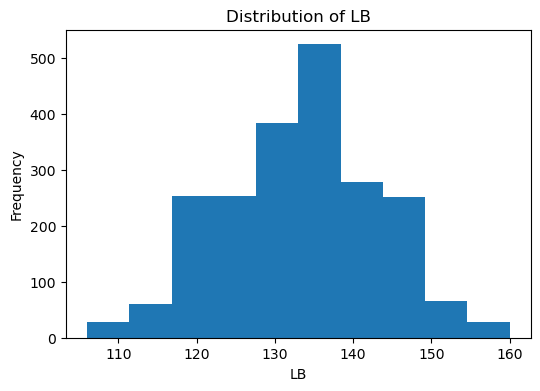

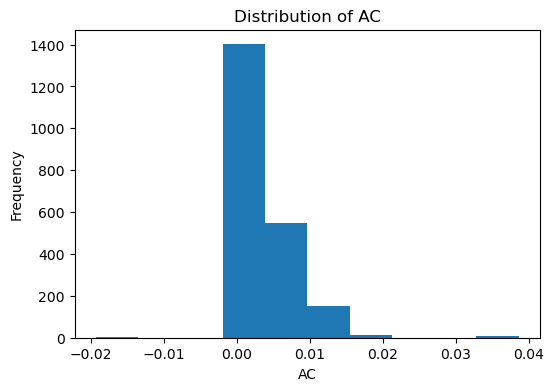

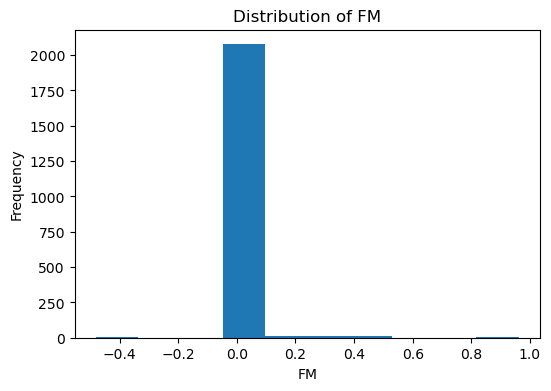

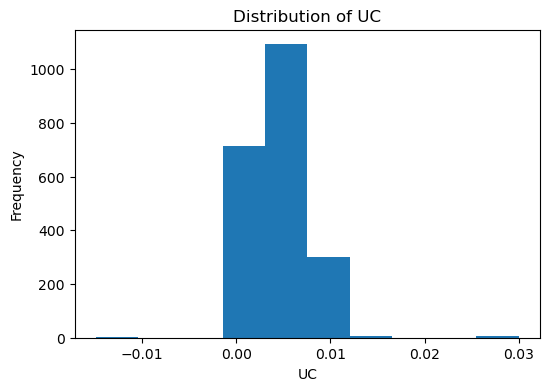

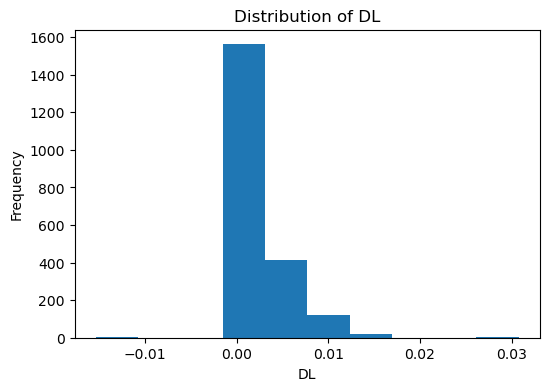

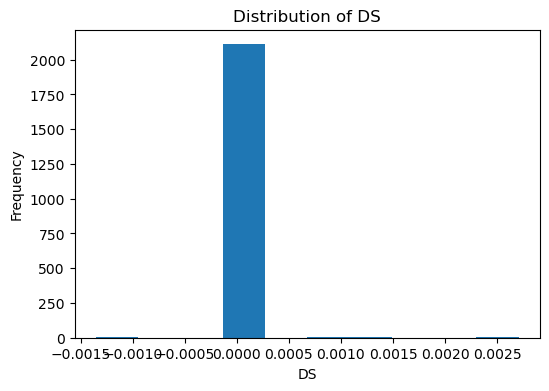

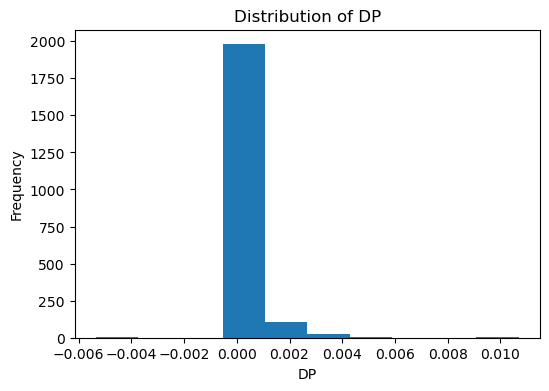

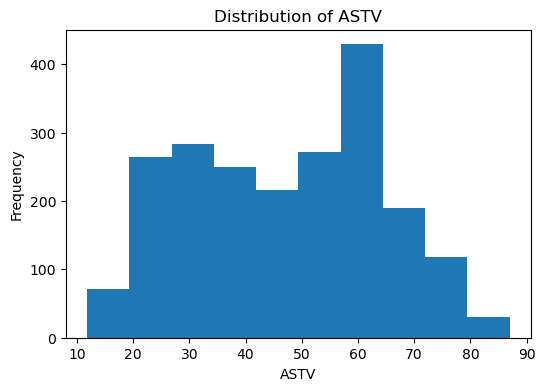

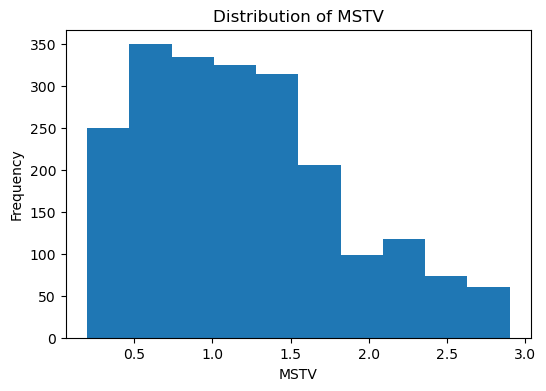

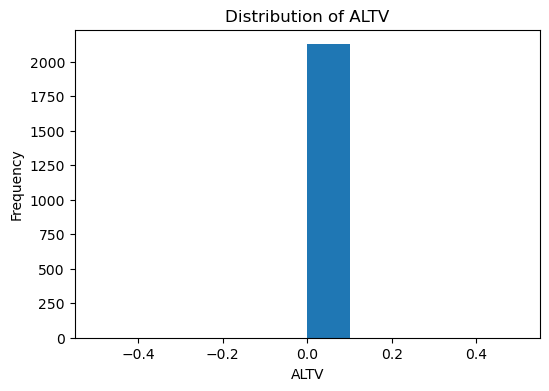

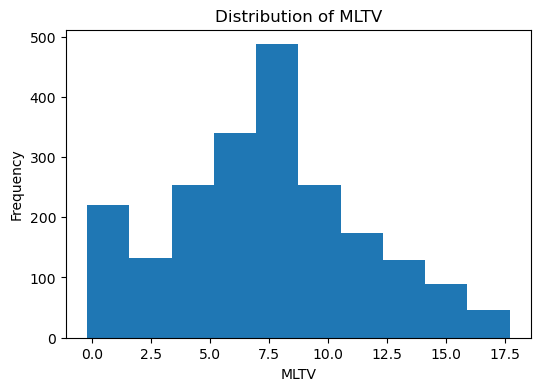

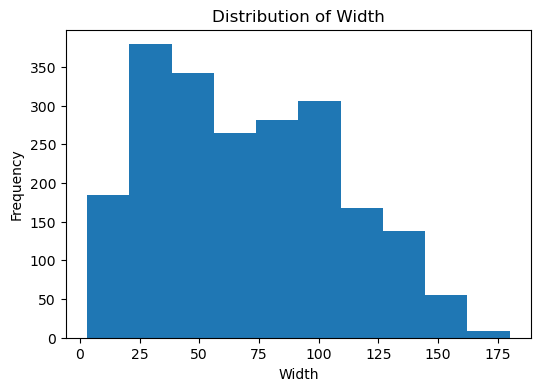

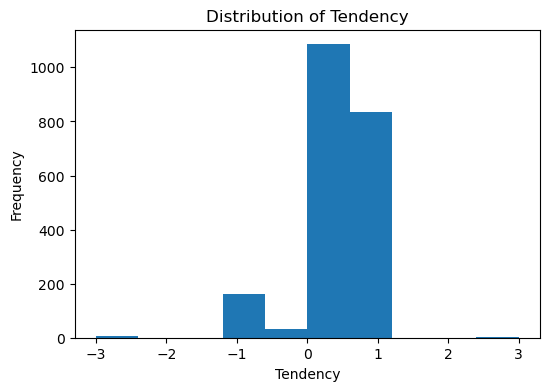

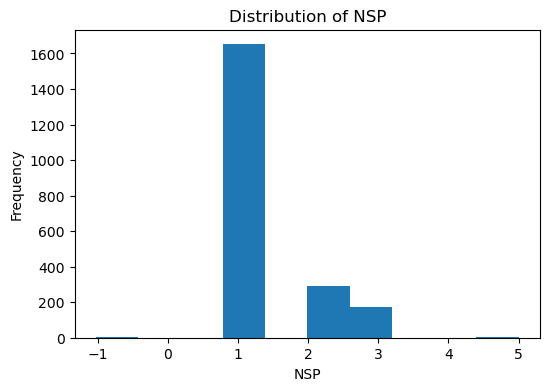

In [ ]:
# Check if the column contains numeric data
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['float']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
df.skew()

#lb  astv altv is following Normal distribution pattern.after removing outliers
# MLTV and MSTV are slightly  potivtive  skewed even after removing outliers

LB          0.008860
AC          2.032396
FM          6.753070
UC          0.974239
DL          2.010390
DS          8.461304
DP          6.456342
ASTV       -0.014592
MSTV        0.591261
ALTV        0.000000
MLTV        0.157092
Width       0.320128
Tendency   -0.484072
NSP         1.826906
dtype: float64

### -	Use bar charts or pie charts to display the frequency of categories for categorical variables.


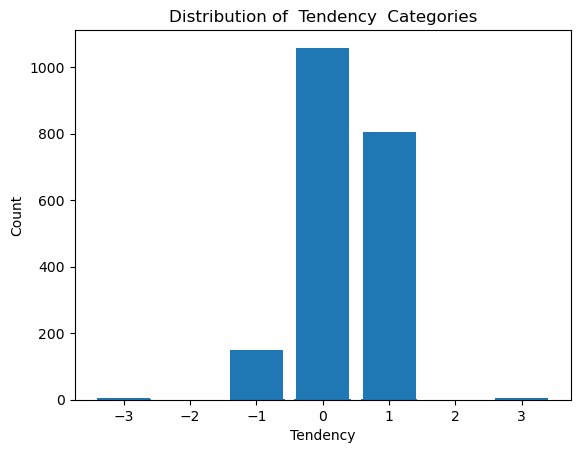

In [ ]:
# Calculate value counts
value_counts1= df['Tendency'].value_counts()

# Create the bar plot
plt.bar(value_counts1.index, value_counts1.values)
plt.xlabel('Tendency')
plt.ylabel('Count')
plt.title('Distribution of  Tendency  Categories')
plt.show()

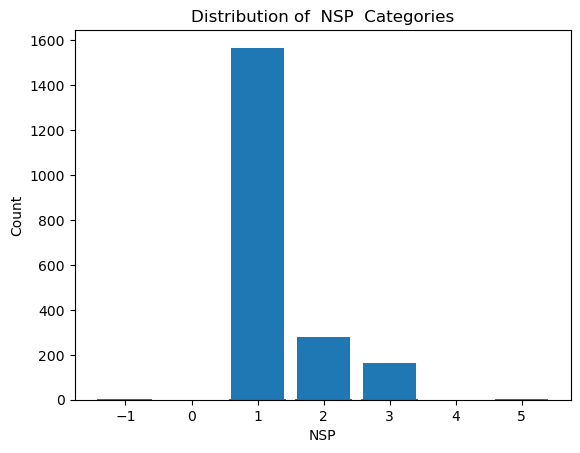

In [ ]:
# Calculate value counts
value_counts2= df['NSP'].value_counts()

# Create the bar plot
plt.bar(value_counts2.index, value_counts2.values)
plt.xlabel('NSP')
plt.ylabel('Count')
plt.title('Distribution of  NSP  Categories')
plt.show()

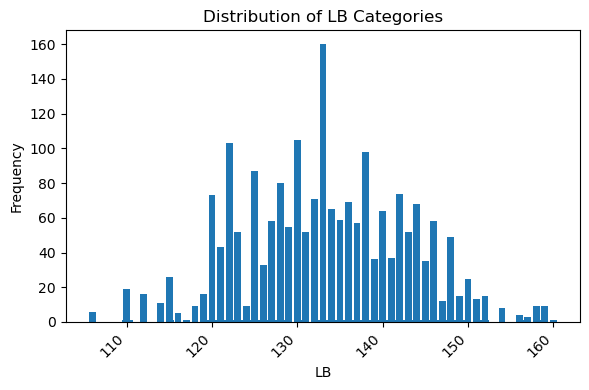

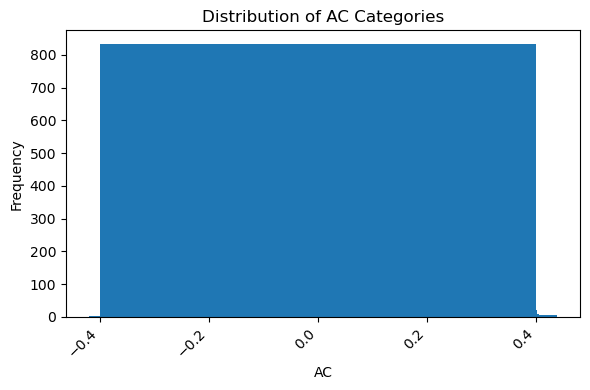

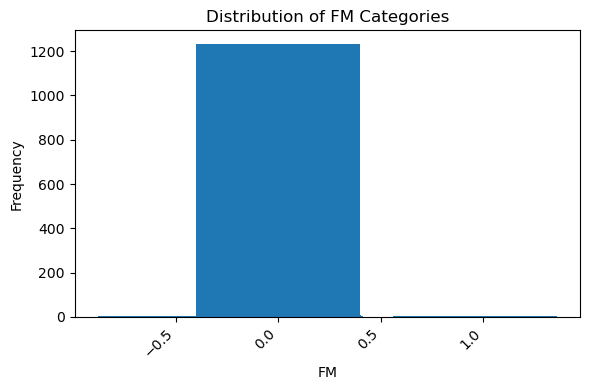

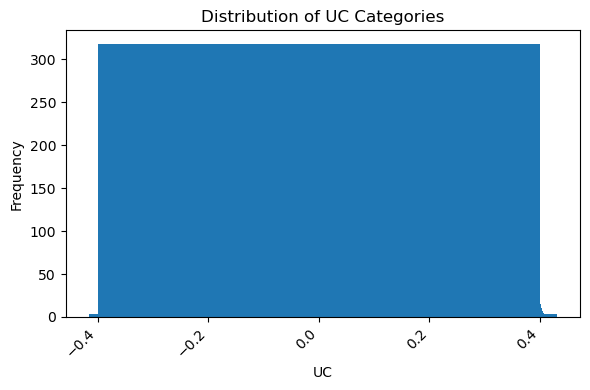

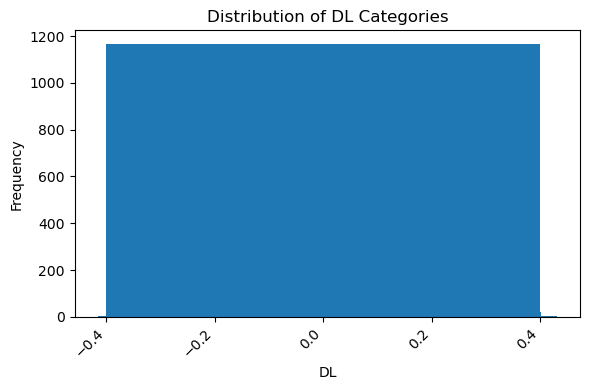

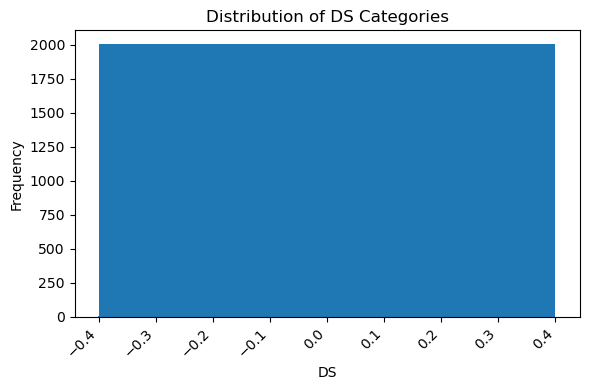

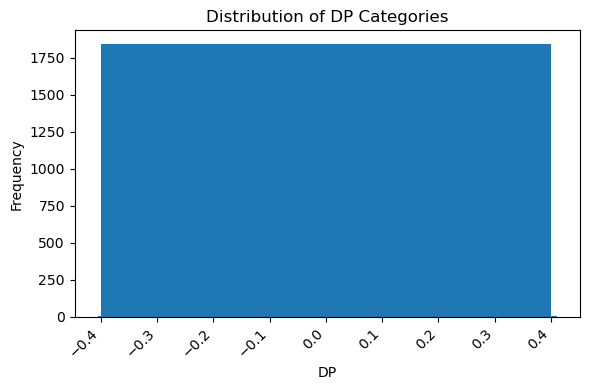

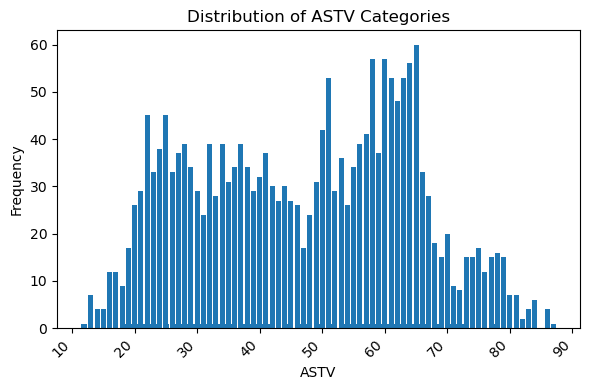

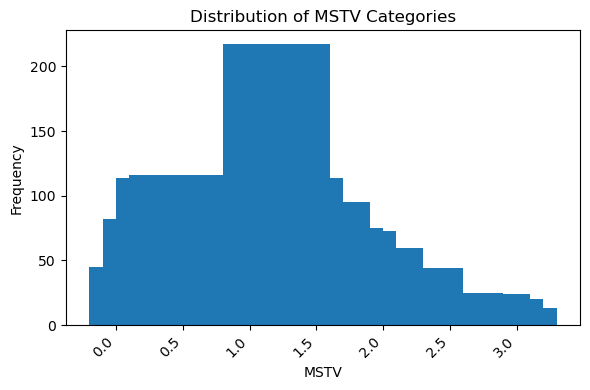

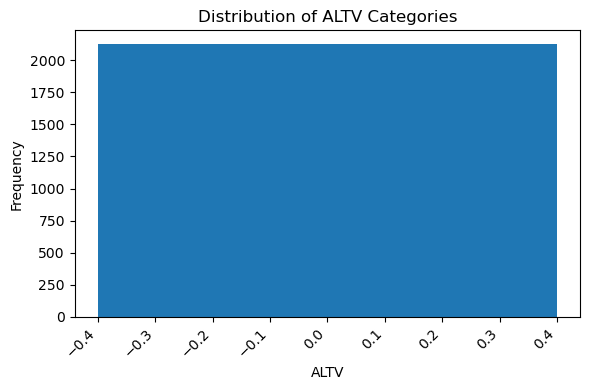

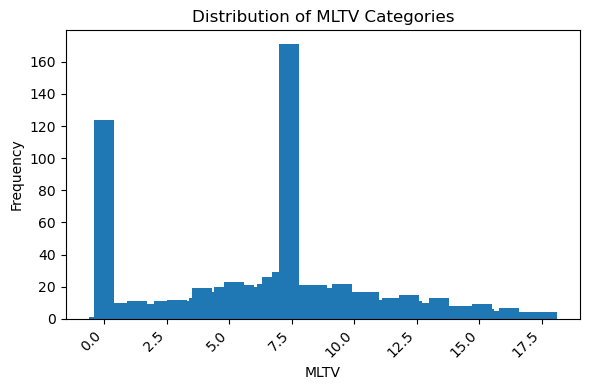

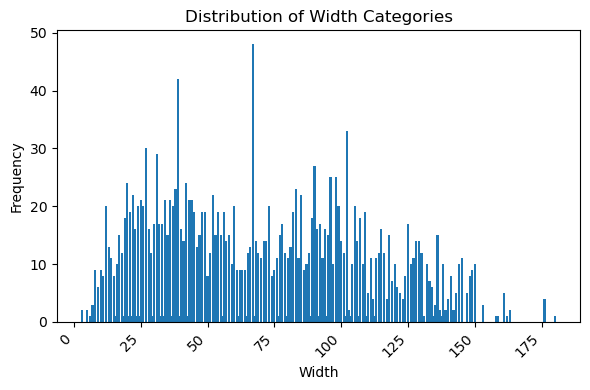

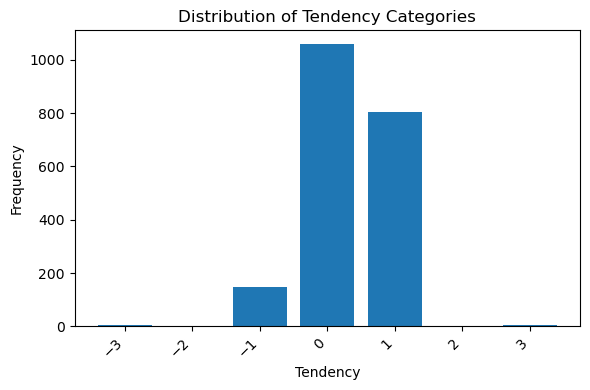

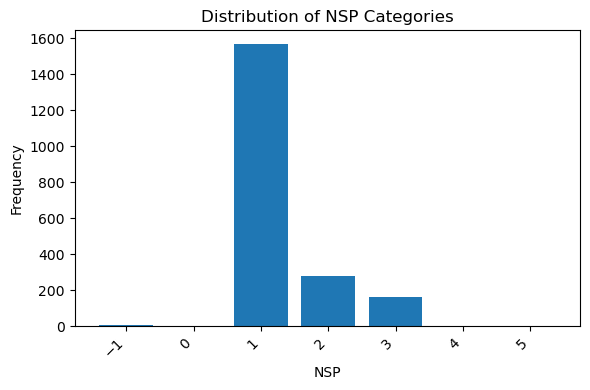

In [ ]:
numeric_col = df.select_dtypes(include=['float']).columns

# Calculate value counts for each categorical column
for col in numeric_col:
    value_counts= df[col].value_counts()

# Plot count plots for each categorical column using matplotlib

    plt.figure(figsize=(6, 4))
    plt.bar(value_counts.index, value_counts.values)
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.title(f"Distribution of {col} Categories")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


### -	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.


In [ ]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.079044,0.022732,-0.156549,-0.131398,-0.006091,-0.053208,0.304295,-0.321831,NaN,-0.076017,-0.142775,0.282346,0.149378
AC,-0.079044,1.000000,0.009768,0.071621,-0.093449,-0.033088,-0.083298,-0.239800,0.222386,NaN,-0.165156,0.251917,0.031710,-0.311689
FM,0.022732,0.009768,1.000000,-0.053226,0.009718,0.029916,0.121459,-0.036104,0.054352,NaN,0.000085,0.087295,-0.017819,0.074446
UC,-0.156549,0.071621,-0.053226,1.000000,0.190128,-0.006938,0.070295,-0.199756,0.274984,NaN,-0.083207,0.126709,-0.066832,-0.185229
DL,-0.131398,-0.093449,0.009718,0.190128,1.000000,0.058413,0.144717,-0.085594,0.433073,NaN,-0.265491,0.452790,-0.023914,0.024879
DS,-0.006091,-0.033088,0.029916,-0.006938,0.058413,1.000000,0.004321,0.009341,0.034038,NaN,-0.000726,0.045238,-0.015294,0.065411
DP,-0.053208,-0.083298,0.121459,0.070295,0.144717,0.004321,1.000000,0.041827,0.183058,NaN,-0.208710,0.176696,-0.129204,0.295057
ASTV,0.304295,-0.239800,-0.036104,-0.199756,-0.085594,0.009341,0.041827,1.000000,-0.457179,NaN,-0.282129,-0.255985,-0.002284,0.456811
MSTV,-0.321831,0.222386,0.054352,0.274984,0.433073,0.034038,0.183058,-0.457179,1.000000,NaN,-0.125036,0.610304,-0.035641,-0.169519
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


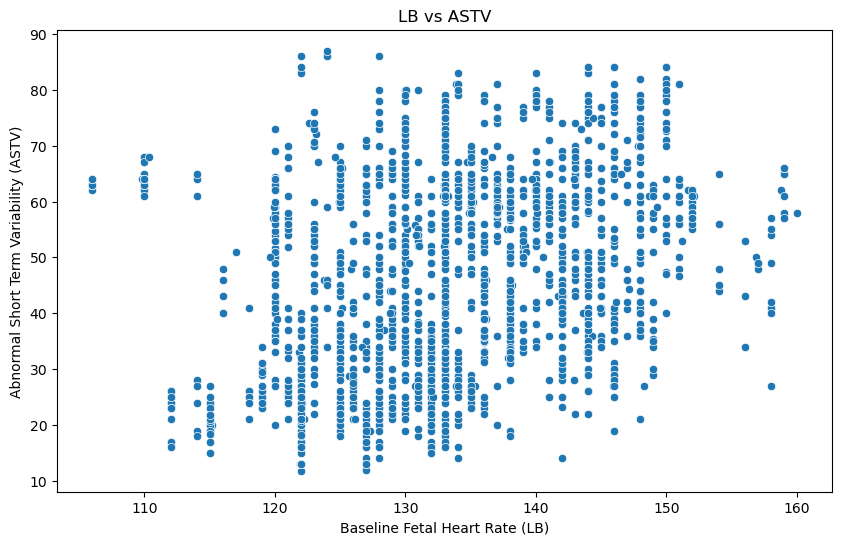

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='ASTV', data=df)
plt.title('LB vs ASTV')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Abnormal Short Term Variability (ASTV)')
plt.show()

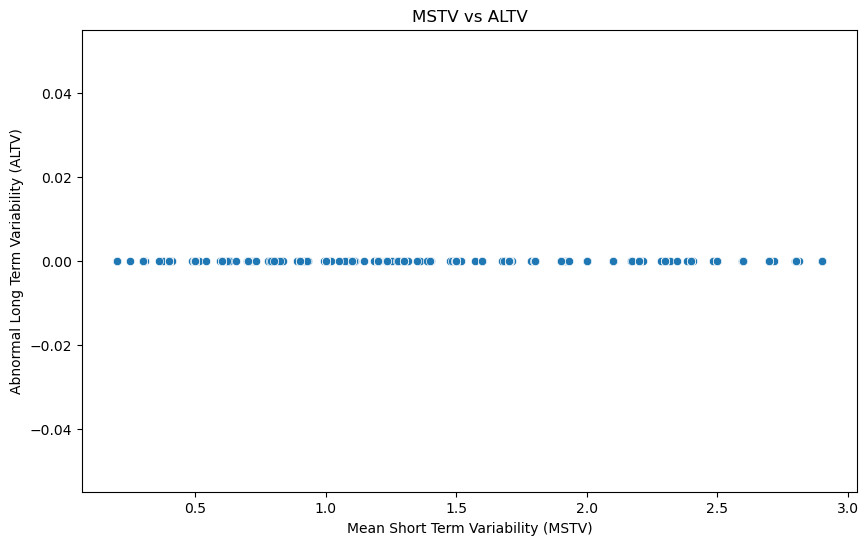

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MSTV', y='ALTV', data=df)
plt.title('MSTV vs ALTV')
plt.xlabel('Mean Short Term Variability (MSTV)')
plt.ylabel('Abnormal Long Term Variability (ALTV)')
plt.show()

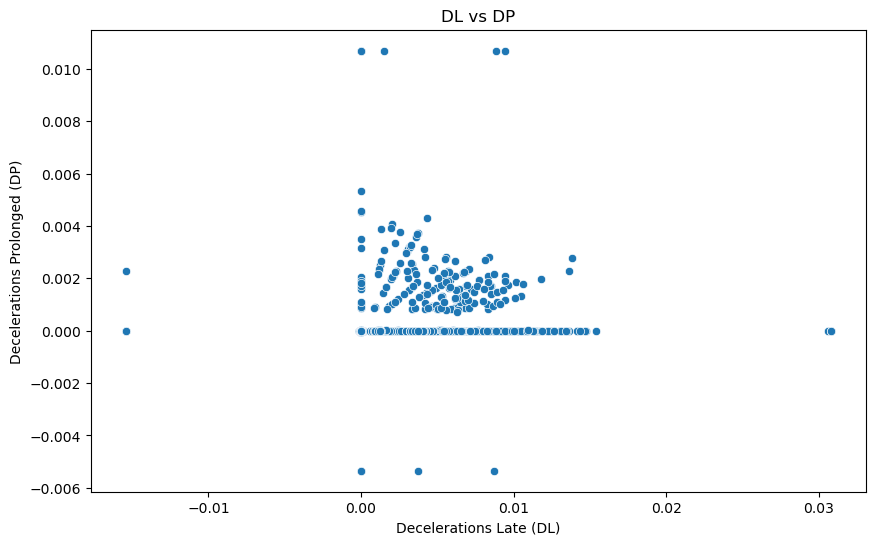

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DL', y='DP', data=df)
plt.title('DL vs DP')
plt.xlabel('Decelerations Late (DL)')
plt.ylabel('Decelerations Prolonged (DP)')
plt.show()

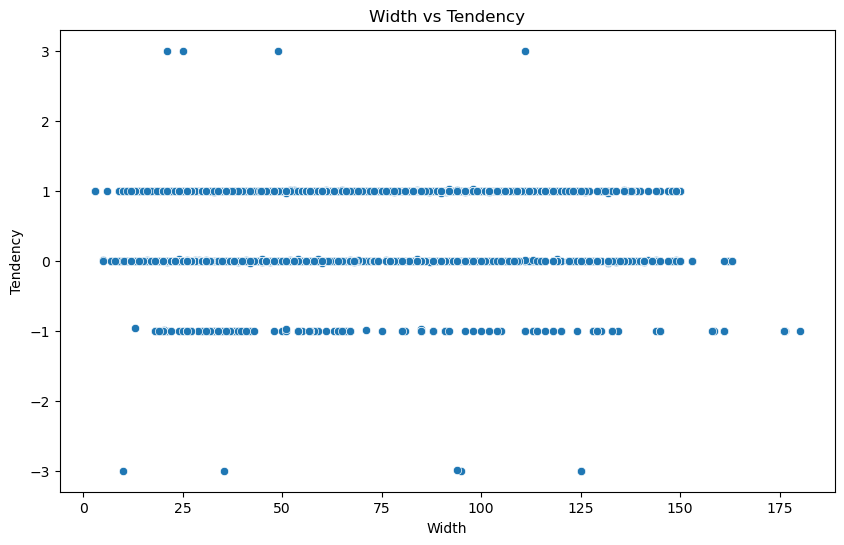

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Width', y='Tendency', data=df)
plt.title('Width vs Tendency')
plt.xlabel('Width')
plt.ylabel('Tendency')
plt.show()

Text(0, 0.5, 'Non-Stress Test Result (NSP)')

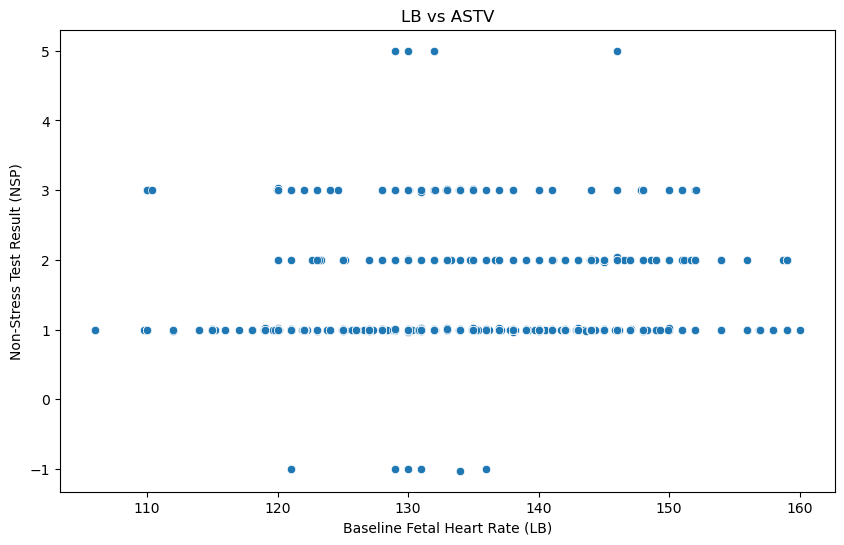

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='NSP', data=df)
plt.title('LB vs ASTV')

plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Non-Stress Test Result (NSP)')

LB (Baseline Fetal Heart Rate) vs. ASTV (Abnormal Short Term Variability)

Why: To explore if there's any relationship between the baseline fetal heart rate and short-term variability. It can help you see if higher or lower baseline heart rates are associated with more variability.

MSTV (Mean Short Term Variability) vs. ALTV (Abnormal Long Term Variability)

Why: To investigate the relationship between short-term and long-term variability. This can reveal how consistent the heartbeat variability is over different time frames.

DL (Decelerations Late) vs. DP (Decelerations Prolonged)

Why: To understand the relationship between late decelerations and prolonged decelerations. This can help in identifying patterns or correlations between these two types of deceleration events.

Width vs. Tendency

Why: To see how the spread of data points (Width) relates to the overall trend or behavior (Tendency). This can help in understanding how variability influences overall tendencies.

LB (Baseline Fetal Heart Rate) vs. NST (Non-Stress Test Result)

Why: To identify if there's any correlation between the baseline heart rate and the overall test result. This can help in evaluating how baseline heart rate impacts the health status as indicated by the NSP

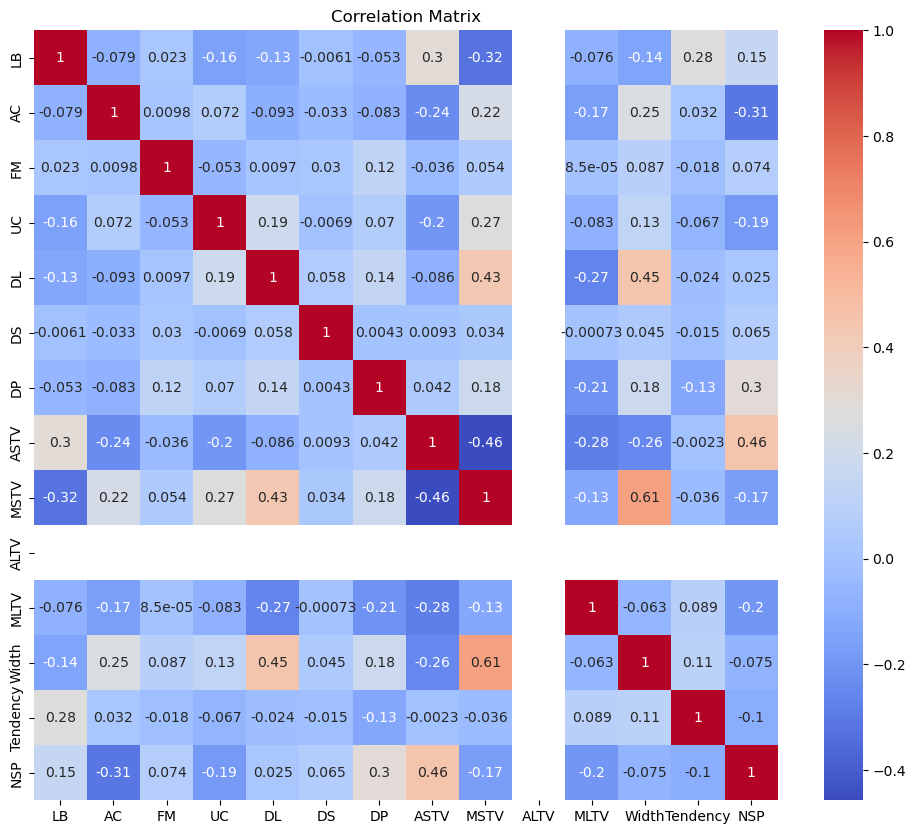

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### - Employ advanced visualization techniques like pair plots, or violin plots for deeper insights


<Figure size 800x600 with 0 Axes>

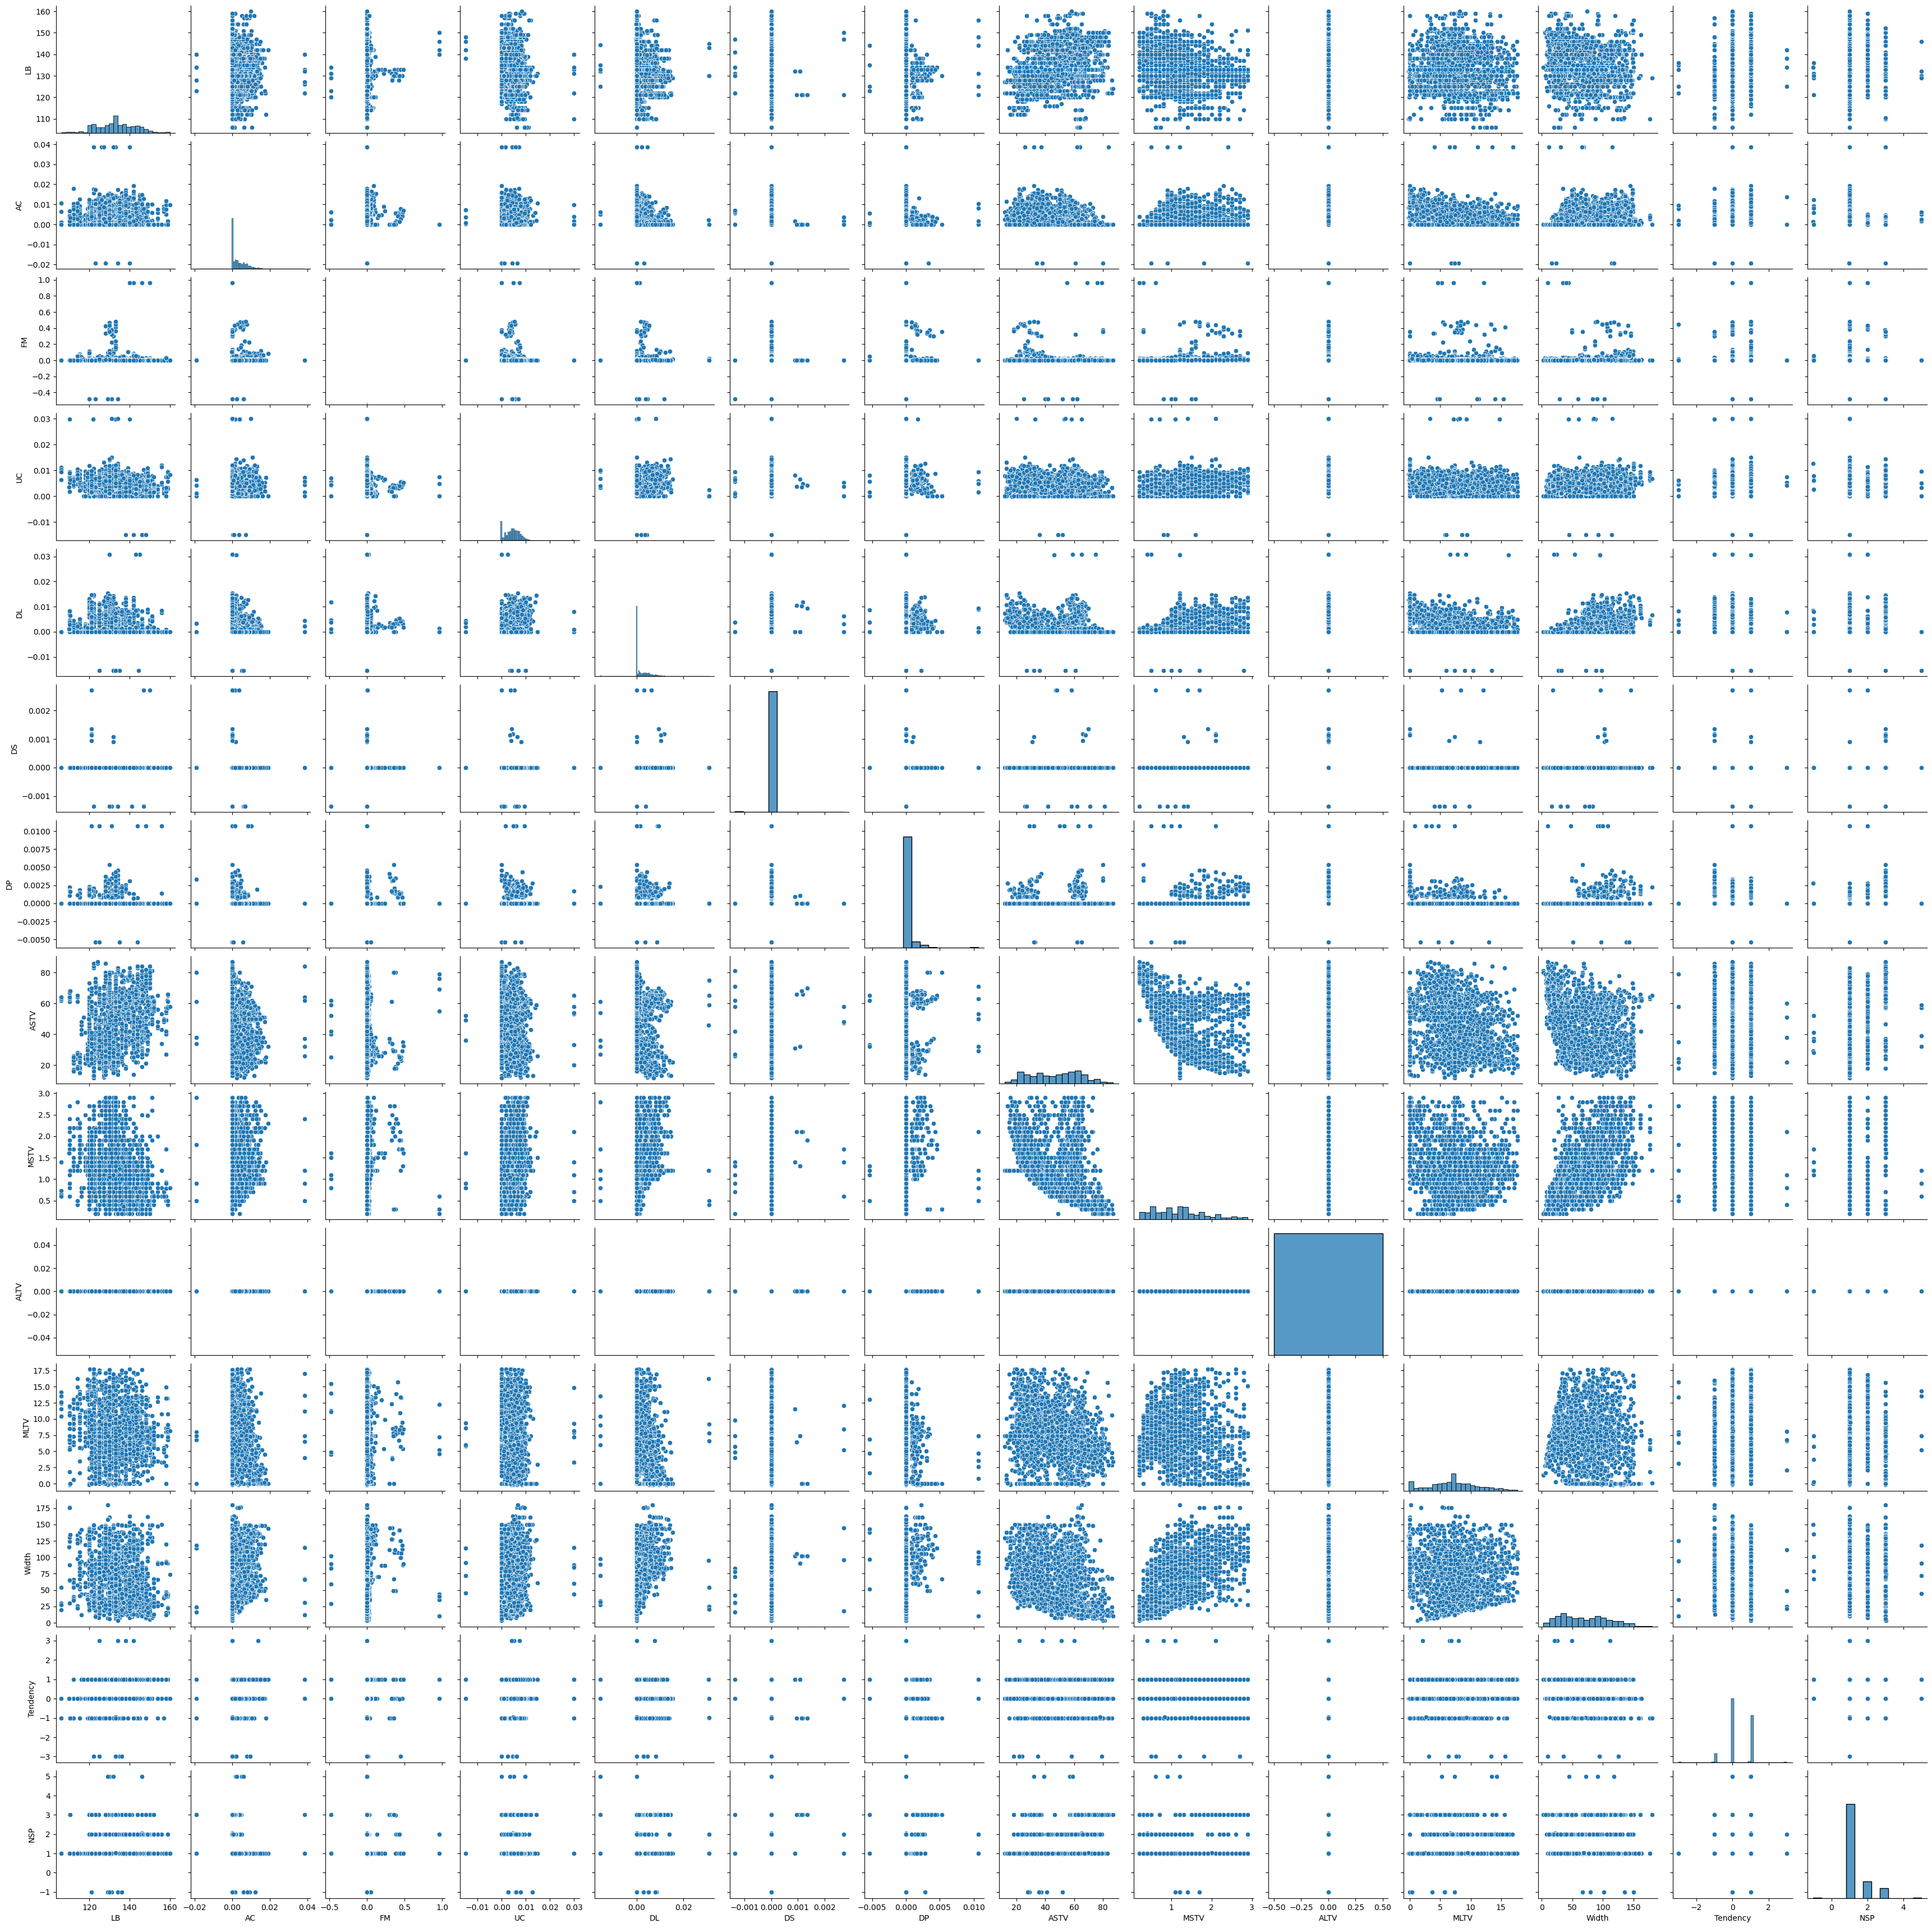

In [ ]:
plt.figure(figsize=(8, 6))
sns.pairplot(df)

# 4.	Pattern Recognition and Insights:
-	Identify any correlations between variables and discuss their potential implications.
-	Look for trends or patterns over time if temporal data is available.


- *as per corr condition the  values above -0.5 & +0.5   indicates strong relation, and   and values  are in range of or  in between  -0.5 - , 0 ,- +0.5 indicates weak  relation*
  
- MSTV & WIDTH highest  **strong positive correlation(0.61)** when compared with all other variables in a dataset ..
- ASTV & NSP have  2nd **weak positive correlation(0.46)** & MSTV &ASTV **weak negative correlation(0.46)**
- DL & WIDTH  have 3rd highest have **weak positive correlation(0.45)** when compared with all other variables.
- DL ,MSTV   has **weak positive correlation(0.43)**
  
- *After exploring relationships between pairs of variables  i can say that there is only one  pair with Strong relation  which is  MSTV & WIDTH*
- There is no DATE & TIME COLUMN present in dataset to look for trends.

# 5.	Conclusion:
-	Summarize the key insights and patterns discovered through your exploratory analysis.
- Discuss how these findings could impact decision-making or further analyses.


In [ ]:
df.skew()

LB          0.008860
AC          2.032396
FM          6.753070
UC          0.974239
DL          2.010390
DS          8.461304
DP          6.456342
ASTV       -0.014592
MSTV        0.591261
ALTV        0.000000
MLTV        0.157092
Width       0.320128
Tendency   -0.484072
NSP         1.826906
dtype: float64

**PATTERNS**

- IN this variables [	AC	FM UC DL   MSTV	ALTV	MLTV	Width ]The median is smaller than the mean, indicating a positive skew. More lower values and a few high outliers.

- IN this variables [ASTV ]The mean is smaller than the median, indicating a negative skew.More higher values and a few low outliers.

- High Variability (Wide Range): Columns such as [Width	ALTVMLTV DL FM AC ] have high standard deviations, indicating they are spread over a wide range of values   or Data points are widely spread around the mean..

- Low Variability (Narrow Range): Columns such as [ lb ,DP ,UC,ASTV,MSTV, Tendency ,NSP] have low standard deviations, indicating they have a narrow range of values. or Data points are closely clustered around the mean.

- High IQR:[Width	ALTV	ASTV	LB	Tendency	MSTV] The central 50% of data points are spread out over a larger range and  have high variability  between them, even after   ignoring the extremes..

-Low IQR: [DL	UC	AC	FM	] The central 50% of data points are closely clustered and have low variability between them, indicating consistency and less dispersion in these columns.

The presence of the negative minimum value may point to outliers or noise in the data.
**Remove Outliers From:**

1.Width: Due to its wide range and high standard deviation.

2. ALTV and MLTV: Due to high standard deviation and wide range.

3. ASTV: Due to significant range and standard deviation.

**Do Not Remove Outliers From:**

1. NSP: Std is 0, indicating no variation.

2.DS and DP: Std is 0, indicating no variation.

3.Tendency: Despite a wide range, it has a moderate std and its skewness may be important for analysis.

**hist**
- LB (0.008860),DS (0.000000),DP (0.000000),NSP (0.000000):: Near zero, indicating a normal distribution (ND) PATTERN .

- AC   DL UC MSTV MLTV WIDTH : Positive value, indicating positive skewness due to presence of outliers..

- FM (2.344839) ,ALTV (2.417487): Larger positive value, indicating strong positive skewness due to presence of outliers..

- ASTV (-0.014592): Near zero but slightly negative, indicating a slightly negative skewness due to presence of outliers..

- Tendency (-0.308493): Negative value, indicating negative skewness due to presence of outliers
  
**bar**
-  most of the  score of the NST(non-stress test) IS in between (0 - 1).
-(altv) most of the heartbeat changes in a strange way over a long period time and  (astv)heartbeat changes in a strange way over a short period is
in btween 0 to 50.

-- In Tendency(-3  ,+3),NSP(-1, 5) columns  range is TOO small hence removing outliers is not good idea



Further Analyses:

**Predictive Modeling:**
-Using the identified correlations, i can develop predictive models to estimate NSP based on factors like ASTV , ALTV  AC .HERE  weak relation
- After exploring relationships between pairs of variables  i can say that there is only one pair with Strong relation it suggests that a linear
relationship . but is not a good fit for the data..the var have  weak realation with NSP so make predictions with either Decision Tree Regression  or ,
Support Vector Regression (SVR )
